### Regression with a Tabular Media Campaign Cost Dataset

This tutorial is a guide on solving the regression problems and understanding the maths behind the regression models in-depth. One
can easily correlate it with scikit-learn library while walking through the code. The dataset choosen for this is a <i>Media Campaign Cost Prediction</i> dataset.

For more information on the dataset you can refer to this link:
    https://www.kaggle.com/competitions/playground-series-s3e11/data
    
#### Problem Statement:
   Develop a machine learning model that helps us to predict the cost of media campaigns in the food marts, based on the features.
   
##### Dataset Description:
   - id: ID of the store
   - store_sales(in millions): store_sales(in million dollars)
   - unit_sales(in millions): unit_sales(in millions) in stores Quantity
   - total_children : total children in home
   - num_children_at_home: Number of children at home as per customers' filled details
   - avg_cars_at home(approx).1 : Average cars at home
   - gross_weight : Gross weight of an item
   - recyclable_package: Food item is recyclable_package
   - low_fat: Food item being low fat
   - units_per_case: Units/Case units available in each store shelves
   - store_sqft: Store area available in sqft
   - coffee_bar: Coffee bar available in store
   - video_store: Video store/gaming store available
   - salad_bar: Salad bar available in store
   - prepared_food: Food prepared available in store
   - florist: Flower shelves available in store
   - cost: Cost on acquiring a customers in dollars
        

### Reading the train and test datasets

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# load all zip files in folder
train_df = pd.read_csv(r"D:\US Job Search\ML-Projects\Datasets\Media_Campaign_Cost_Dataset\train.zip",compression="zip")
test_df = pd.read_csv(r"D:\US Job Search\ML-Projects\Datasets\Media_Campaign_Cost_Dataset\test.zip",compression="zip")



In [3]:
# Shape of the datasets respectively
print("Train dataset shape:",train_df.shape)
print("Test dataset shape:",test_df.shape)

Train dataset shape: (360336, 17)
Test dataset shape: (240224, 16)


In [4]:
train_df.head()

,id,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
0,0,8.61,3.0,2.0,2.0,2.0,10.30,1.0,0.0,32.0,36509.0,0.0,0.0,0.0,0.0,0.0,62.09
1,1,5.00,2.0,4.0,0.0,3.0,6.66,1.0,0.0,1.0,28206.0,1.0,0.0,0.0,0.0,0.0,121.80
2,2,14.08,4.0,0.0,0.0,3.0,21.30,1.0,0.0,26.0,21215.0,1.0,0.0,0.0,0.0,0.0,83.51
3,3,4.02,3.0,5.0,0.0,0.0,14.80,0.0,1.0,36.0,21215.0,1.0,0.0,0.0,0.0,0.0,66.78
4,4,2.13,3.0,5.0,0.0,3.0,17.00,1.0,1.0,20.0,27694.0,1.0,1.0,1.0,1.0,1.0,111.51


Column "id" won't be useful in our analysis.Let's try to drop this feature.

In [5]:
train_df.drop("id",axis=1,inplace=True)
test_df.drop("id",axis=1,inplace=True)

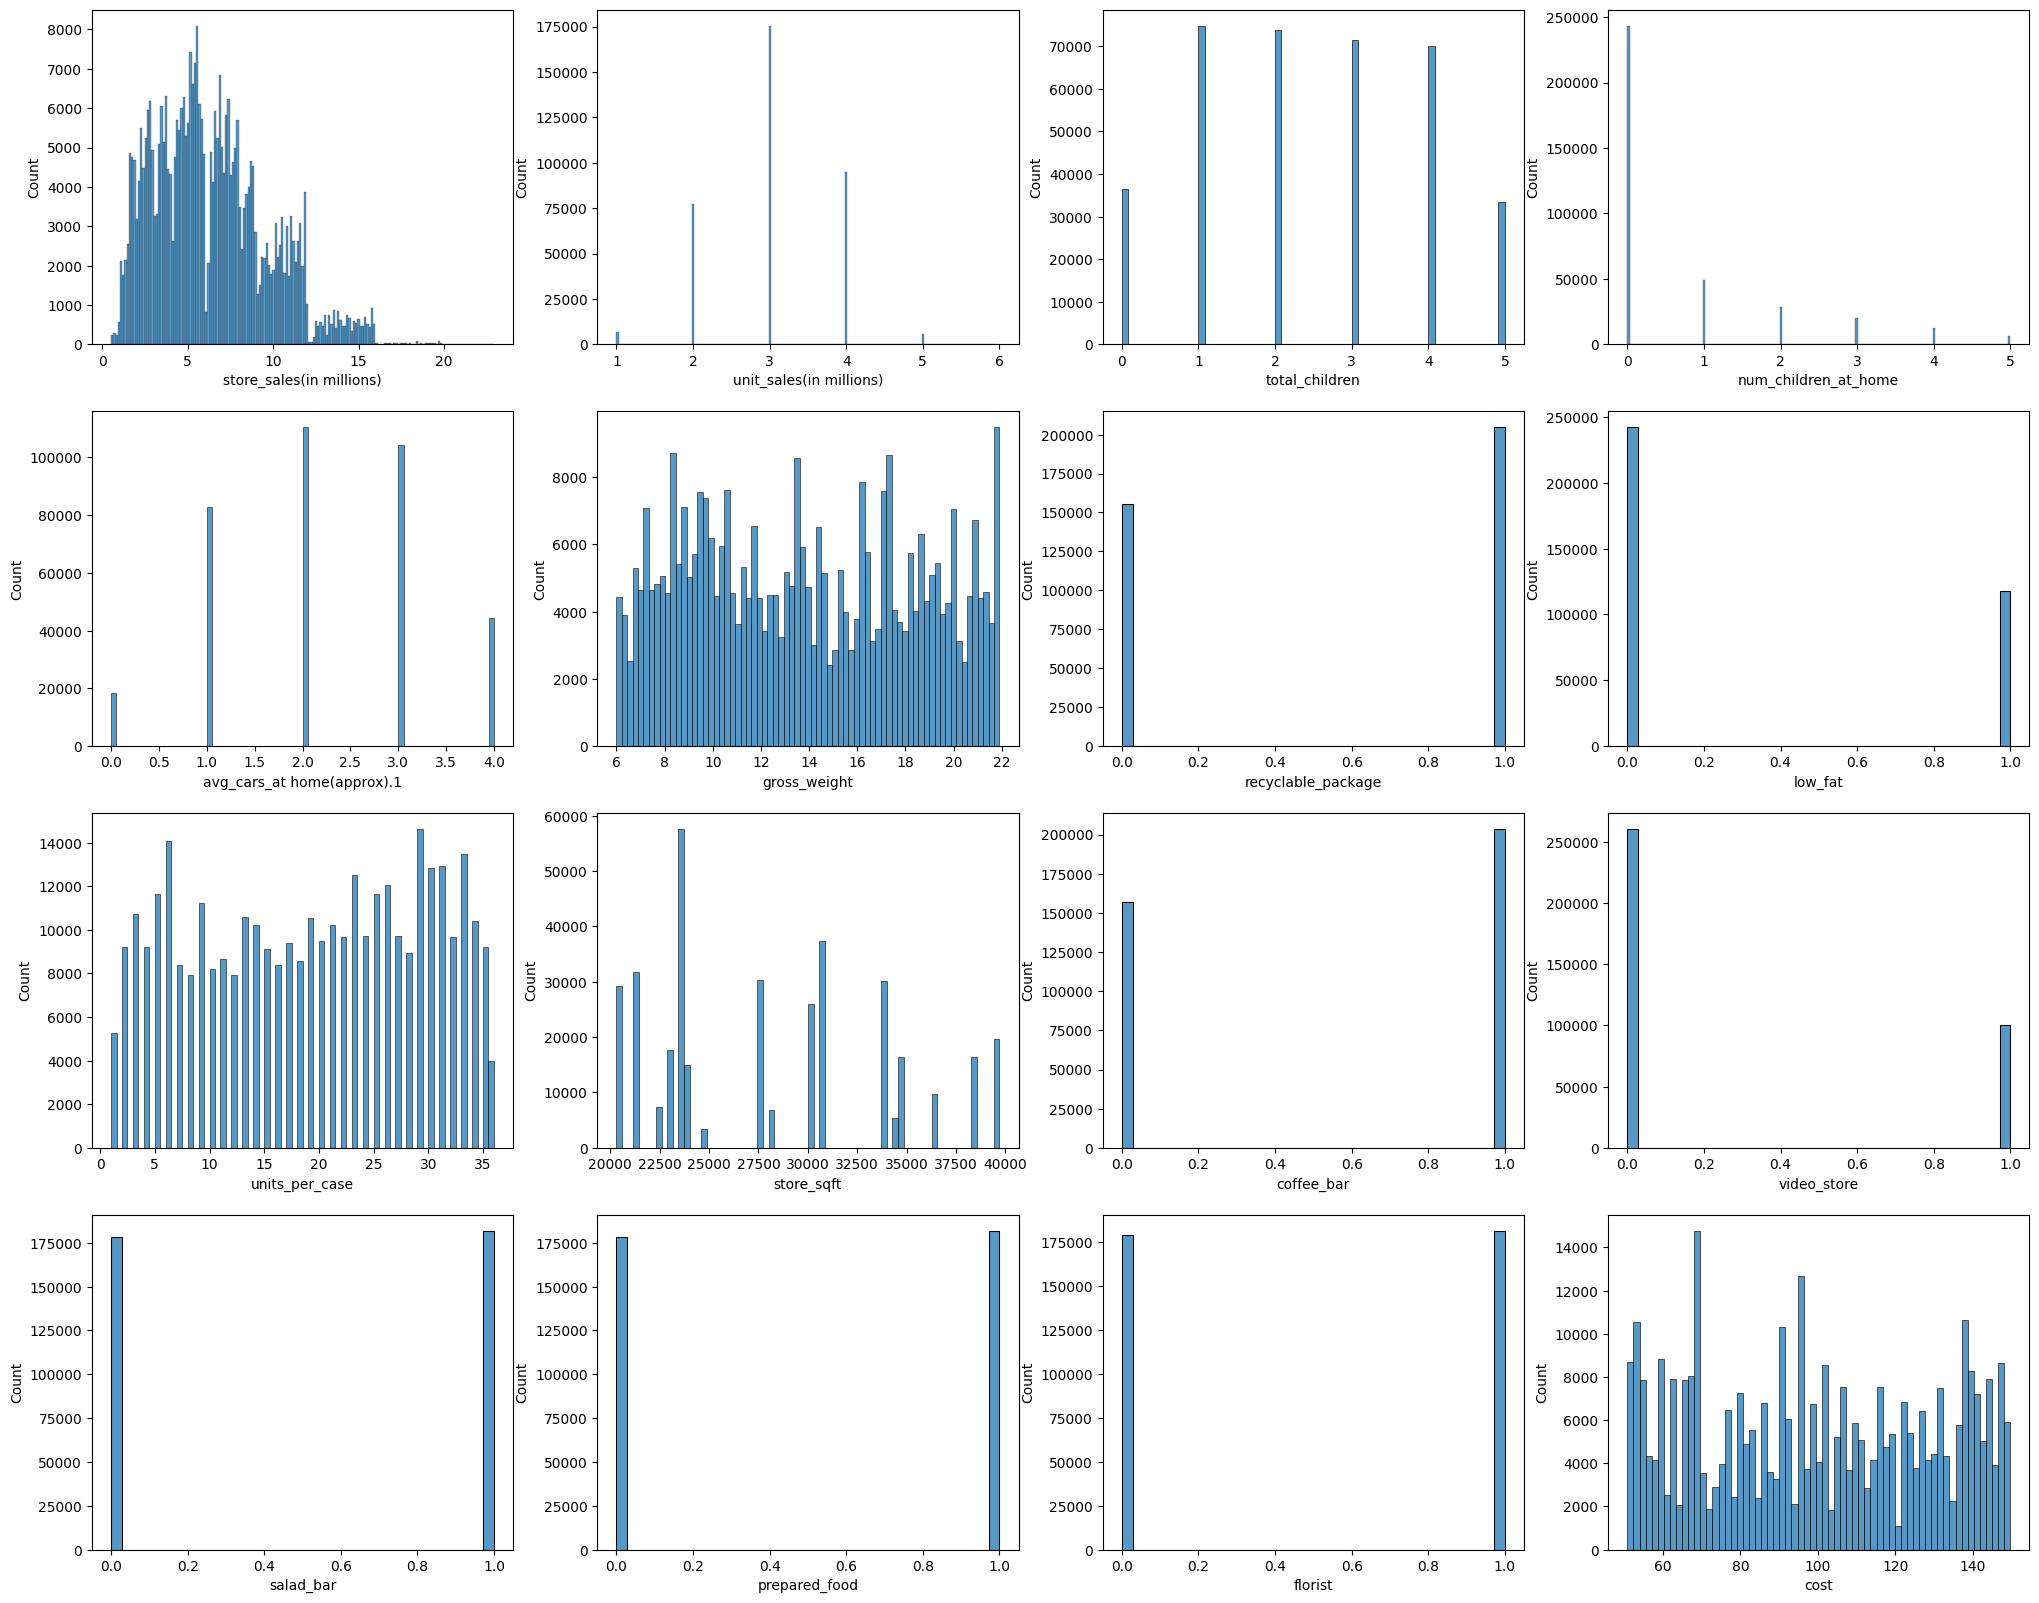

In [6]:
# Understanding the distribution of data among features
fig = plt.figure(figsize=(25,20))
for i,col in enumerate(train_df.columns):
    fig.add_subplot(4,4,i+1)
    sns.histplot(x=col,data=train_df)
    

Converting the columns "recyclable_package","low_fat","coffee_bar","video_store","salad_bar","prepared_food" and "florist" as type category.

#### Machine Learning models

##### Linear Regression model

- <b>Predictors / Response Variable</b> : "store_sales(in millions)", "unit_sales(in millions)", "total_children", "num_children_at_home",
    "avg_cars_at home(approx).1","gross_weight","recyclable_package","low_fat","units_per_case","store_sqft","coffee_bar","video_store",
    "salad_bar","prepared_food","florist"
    
- <b> Target Variable </b> : cost

- <b> Loss Function </b> : Mean Squared Error
    
- <b> Optimization Algorithm </b> : SGD (Stochastic Gradient Regressor)
    


In [7]:
test_df.columns

Index(['store_sales(in millions)', 'unit_sales(in millions)', 'total_children',
       'num_children_at_home', 'avg_cars_at home(approx).1', 'gross_weight',
       'recyclable_package', 'low_fat', 'units_per_case', 'store_sqft',
       'coffee_bar', 'video_store', 'salad_bar', 'prepared_food', 'florist'],
      dtype='object')

In [8]:
# Separating the Independent and Dependent features 
train_y = np.array(train_df['cost'].values.tolist())

# Independent train features
train_df.drop(['cost'],axis=1,inplace=True)

# Converting the independent features to numpy array of train and test
train_X = np.asarray(train_df.values.tolist())
test_X = np.asarray(test_df.values.tolist())
